# Machine Learning for Classification

In [64]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For machine learning
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [65]:
# Import CSV file, specify separator and encoding to avoid issues with special characters
df_full = pd.read_csv('bank-full.csv', sep=';', encoding='utf-8')

df_full.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [66]:
# Select relevant features for analysis
selected_features = ['age', 'job', 'marital', 'education', 'balance', 
                     'housing', 'contact', 'day', 'month', 'duration', 
                     'campaign', 'pdays', 'previous', 'poutcome', 'y']

# Create a copy of the dataframe with selected features to avoid modification on the original dataset
df = df_full[selected_features].copy()

# Check for missing values in the dataframe
missing_values = df.isnull().sum()

print(missing_values)

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [67]:
# Calculate mode for the 'education' column after dropping NaN values to ensure robustness
education_mode = df['education'].dropna().mode()[0]

# Print the mode of the 'education' column to understand the most common education level
print("Most frequent education level:", education_mode)

Most frequent education level: secondary


Counts of each education level:
 education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Percentage of each education level:
 education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: proportion, dtype: float64


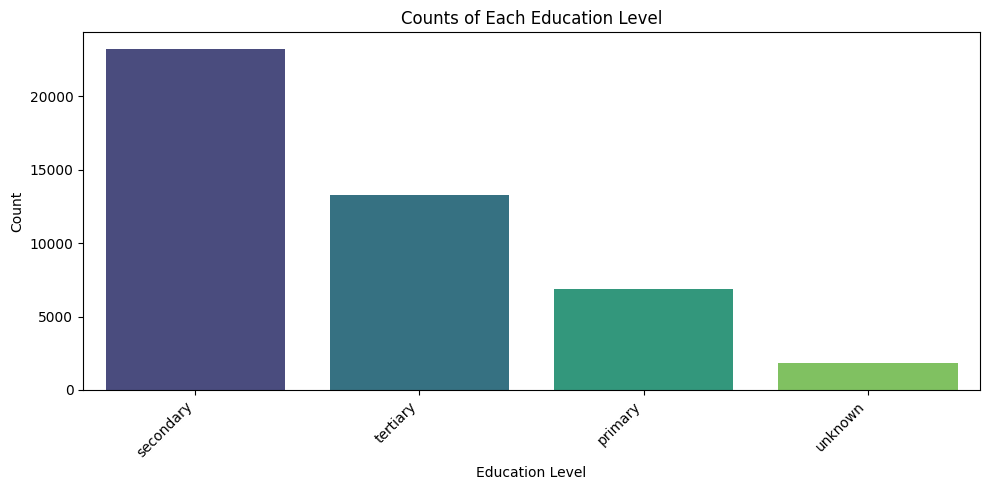

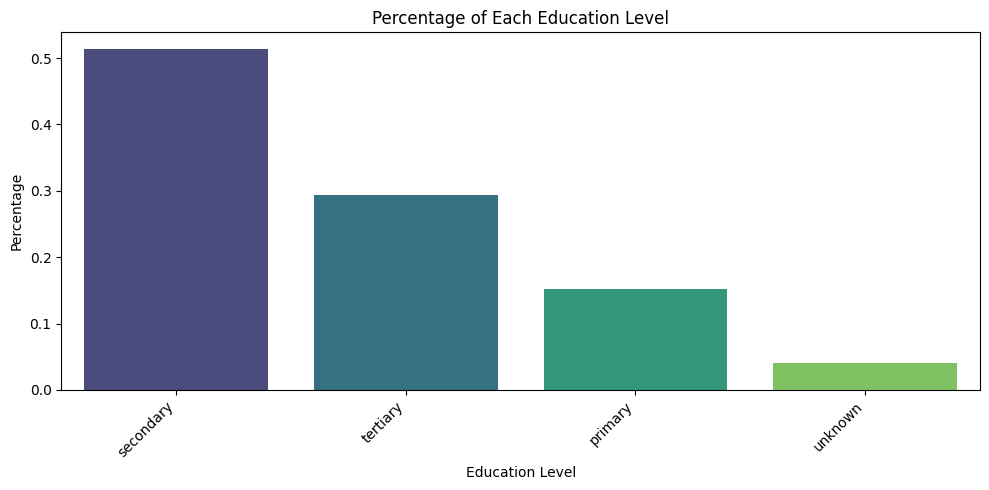

In [68]:
# Get counts for each unique value in the 'education' column, including NaN values if needed
education_counts = df['education'].value_counts(dropna=False)

# Print counts of each education level for better understanding of its distribution
print("Counts of each education level:\n", education_counts)

# Get percentages for each unique value in the 'education' column
education_percentage = df['education'].value_counts(normalize=True, dropna=False)
print("\nPercentage of each education level:\n", education_percentage)

# Plot a bar chart of the counts for each education level
plt.figure(figsize=(10, 5))
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis', hue=education_counts.index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Counts of Each Education Level')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

# Plot a bar chart of the percentages for each education level
plt.figure(figsize=(10, 5))
sns.barplot(x=education_percentage.index, y=education_percentage.values, palette='viridis', hue=education_percentage.index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.title('Percentage of Each Education Level')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

In [69]:
# Select numerical columns from the dataframe using select_dtypes for better readability
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

print("Numerical features:", numerical_features)

Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


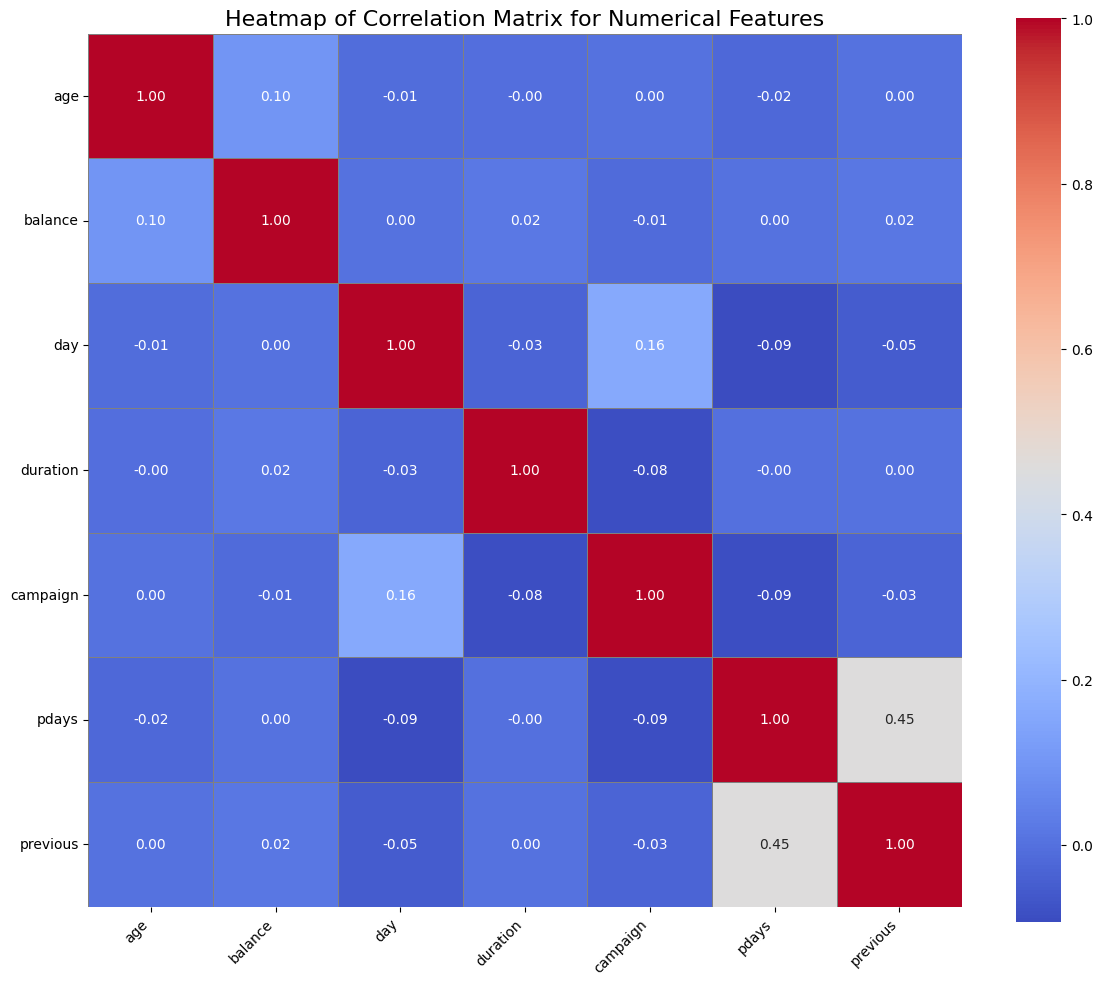

In [70]:
numerical = list(df.select_dtypes(include=['number']).columns)

# Initialize the correlations dictionary
correlations = {k: [] for k in numerical}

# Calculate correlations using nested loops
for col in numerical:
    for col2 in numerical:
        correlations[col].append(df[col].corr(df[col2]))

# Create the correlation matrix DataFrame
correlation_matrix = pd.DataFrame(correlations)
correlation_matrix.index = numerical

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='gray', square=True, fmt=".2f")
plt.title('Heatmap of Correlation Matrix for Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [71]:
# Convert 'y' column to binary values using map function for better readability
df['y'] = df['y'].map({'yes': 1, 'no': 0})

In [72]:
df.y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [73]:
target_column = df['y']

In [74]:
# Split the full dataset into training (80%) and test (20%) sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Split the training dataset further into training (75%) and validation (25%) sets
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

# Extract target variable 'y' for each split using .loc[] for consistency
y_full_train = df_full_train.loc[:, 'y']
y_test = df_test.loc[:, 'y']
y_train = df_train.loc[:, 'y']
y_val = df_val.loc[:, 'y']

# Drop target variable 'y' from feature DataFrames
df_full_train = df_full_train.drop(columns=['y'])
df_test = df_test.drop(columns=['y'])
df_train = df_train.drop(columns=['y'])
df_val = df_val.drop(columns=['y'])

In [75]:
# Select categorical columns from the training dataset using select_dtypes for better readability
categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()

print("Categorical features:", categorical_features)

Categorical features: ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']


In [76]:
# Define the categorical features
categorical = list(df_train.select_dtypes(include=['object']).columns)

# Fill NaN values in categorical features with 'missing' to handle missing data
df_train_filled = df_train[categorical].fillna('missing')

# Calculate mutual information scores for each categorical feature in relation to the target variable 'y_train'
mi = df_train_filled.apply(lambda s: mutual_info_score(s, y_train))

# Sort the mutual information scores in descending order to identify the most important features
mi_sorted = mi.sort_values(ascending=False)

# Print the sorted mutual information scores for each categorical feature
print("Mutual Information Scores for Categorical Features (sorted):\n", mi_sorted)

Mutual Information Scores for Categorical Features (sorted):
 poutcome     0.029533
month        0.025090
contact      0.013356
housing      0.010343
job          0.007316
education    0.002697
marital      0.002050
dtype: float64


In [77]:
# Convert training data to dictionary format
dicts = df_train[categorical + numerical].to_dict(orient='records')

# Initialize DictVectorizer and transform training data
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)

# Initialize and train logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [78]:
# Convert validation data to dictionary format
dicts = df_val[categorical + numerical].to_dict(orient='records')

# Transform validation data to feature matrix
X_val = dv.fit_transform(dicts)

# Predict on validation data
y_pred = model.predict(X_val)

# Calculate and round accuracy to 2 decimal places
round((y_val == y_pred).mean(), 2)

np.float64(0.9)

In [80]:
# Convert training data to dictionary format suitable for DictVectorizer
dicts = df_train[categorical + numerical].to_dict(orient='records')

# Transform dictionary into feature matrix using DictVectorizer and fit model
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Convert validation data to dictionary format and transform using DictVectorizer
dicts_val = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(dicts_val)

# Predict on validation data and calculate original model accuracy
y_pred = model.predict(X_val)
original_accuracy = (y_val == y_pred).mean()
print('Original accuracy:', original_accuracy)

# Iterate over each feature and assess its impact by removing it from the model
feature_impact = []

for f in categorical + numerical:
    # Remove the feature 'f' from the feature set
    smaller_features = [feature for feature in categorical + numerical if feature != f]
    
    # Convert reduced training data to dictionary and transform
    dicts_smaller = df_train[smaller_features].to_dict(orient='records')
    X_train_smaller = dv.fit_transform(dicts_smaller)
    
    # Fit the model without the selected feature
    model.fit(X_train_smaller, y_train)
    
    # Convert validation data without the selected feature and transform
    dicts_val_smaller = df_val[smaller_features].to_dict(orient='records')
    X_val_smaller = dv.transform(dicts_val_smaller)
    
    # Predict on validation data and calculate the difference in accuracy
    y_pred_smaller = model.predict(X_val_smaller)
    accuracy_without_f = (y_val == y_pred_smaller).mean()
    accuracy_difference = original_accuracy - accuracy_without_f
    
    # Append the results for visualization
    feature_impact.append((f, accuracy_difference))

# Sort features by their impact on accuracy in descending order
feature_impact = sorted(feature_impact, key=lambda x: x[1], reverse=True)


Original accuracy: 0.9009068790090687


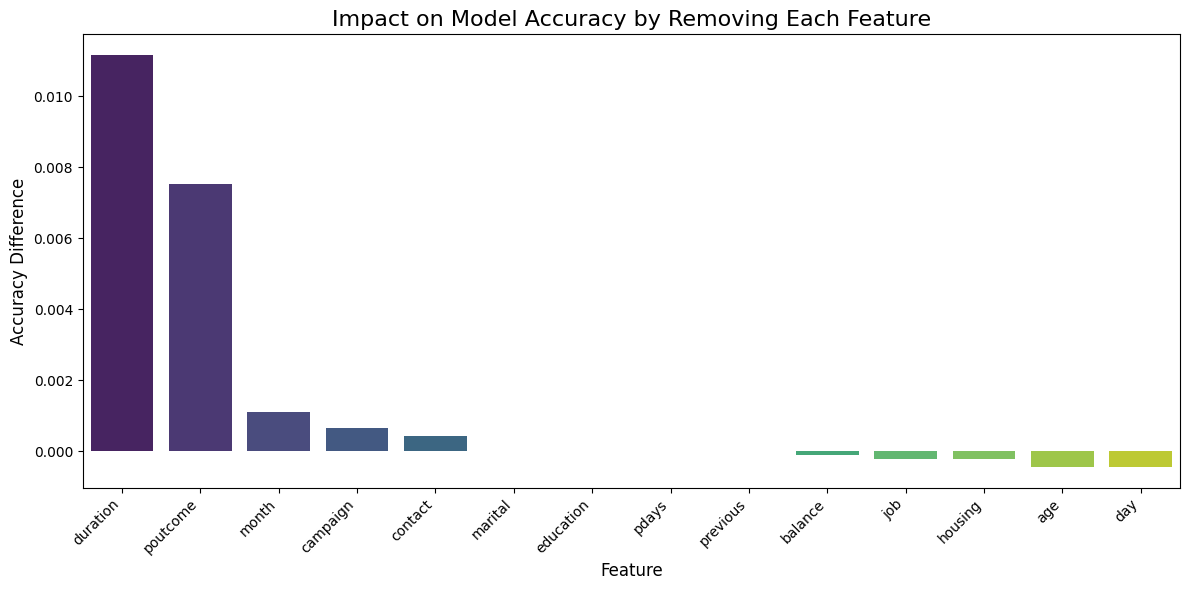

In [84]:
features, impact_values = zip(*feature_impact)

# Plot the feature importance based on accuracy impact
plt.figure(figsize=(12, 6))
sns.barplot(x=list(features), y=list(impact_values), hue=features, palette='viridis', dodge=False)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Accuracy Difference', fontsize=12)
plt.title('Impact on Model Accuracy by Removing Each Feature', fontsize=16)

plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

In [85]:
# Convert training and validation data to dictionary format
dicts_train = df_train[categorical + numerical].to_dict(orient='records')
dicts_val = df_val[categorical + numerical].to_dict(orient='records')

# Transform data to feature matrices using DictVectorizer
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts_train)
X_val = dv.transform(dicts_val)  # Use transform instead of fit_transform to keep consistency

# Iterate over different values of regularization parameter C and store accuracy
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    # Train logistic regression model with specified C value
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    # Predict on validation data
    y_pred = model.predict(X_val)

    # Calculate accuracy
    accuracy = round((y_val == y_pred).mean(), 3)
    accuracies.append(accuracy)
    print(f"{C}:", accuracy)


0.01: 0.898
0.1: 0.901
1: 0.901
10: 0.901
100: 0.901


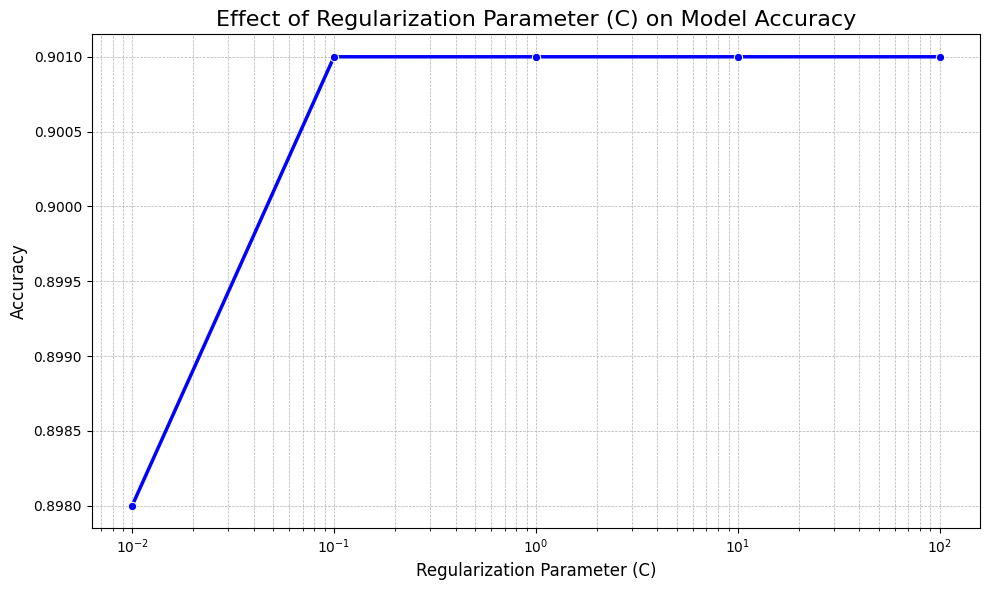

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the accuracy for different values of regularization parameter C
plt.figure(figsize=(10, 6))
sns.lineplot(x=C_values, y=accuracies, marker='o', color='b', linewidth=2.5)

# Customizing the plot for better visualization
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Effect of Regularization Parameter (C) on Model Accuracy', fontsize=16)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Plot
plt.tight_layout()
plt.show()